<a href="https://colab.research.google.com/github/trong-khanh-1109/CS116.M12.KHCL/blob/main/opencv_tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Counting objects

In [ ]:
#Reference: https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import the necessary packages
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

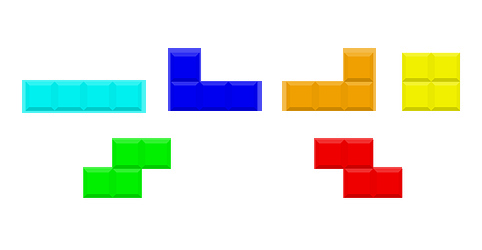

In [ ]:
image = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Image/tetris_blocks.png")
cv2_imshow(image)

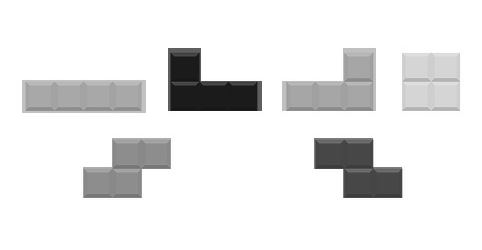

In [ ]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#2. Edge detection

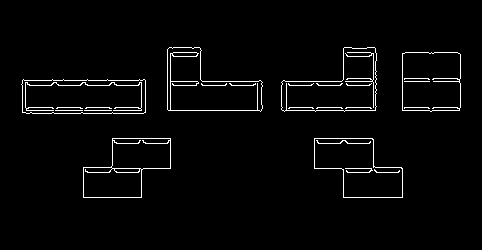

In [ ]:
edged = cv2.Canny(gray, 30, 150)
#image gray, A minimum threshold, The maximum threshold, The Sobel kernel size
cv2_imshow(edged)

#3. Thresholding

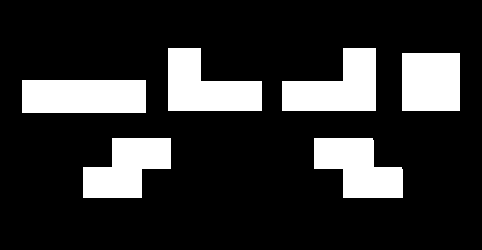

In [ ]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

#4. Detecting and drawing contours

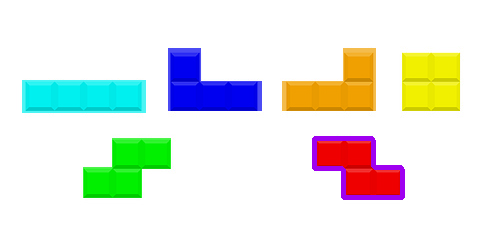

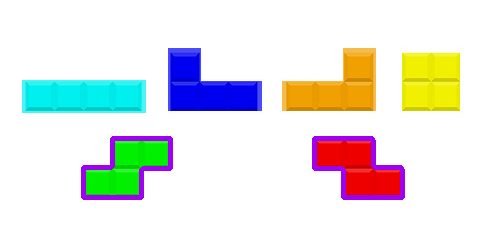

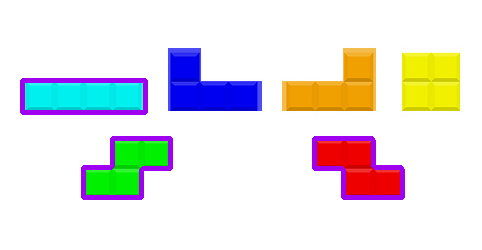

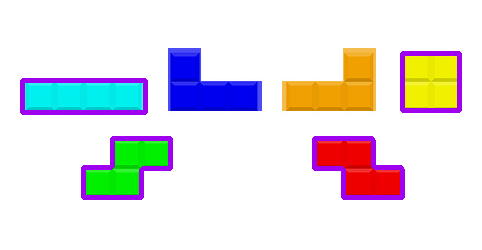

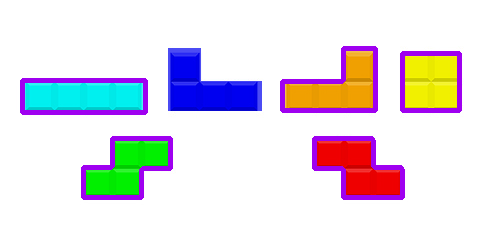

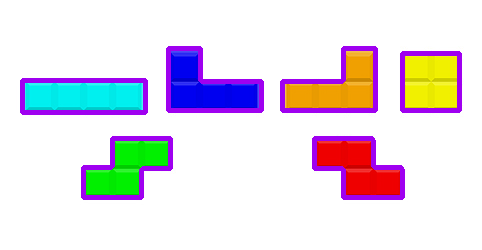

In [ ]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	cv2_imshow(output)

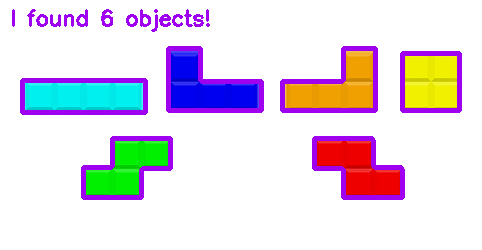

In [ ]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2)
cv2_imshow(output)

#5. Erosions and dilations

##Ersions (Ăn mòn)

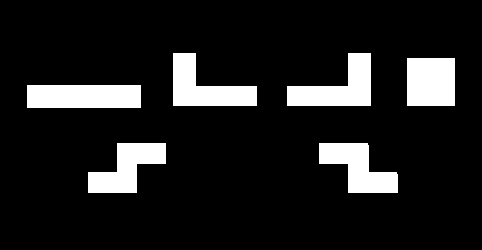

In [ ]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)

##Dilations (sự giãn nở)

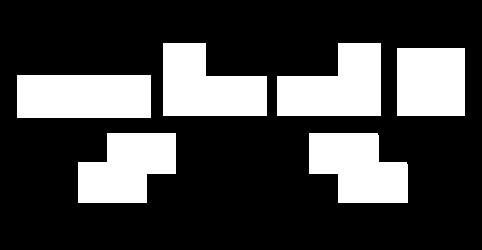

In [ ]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)

#6. Masking and bitwise operations

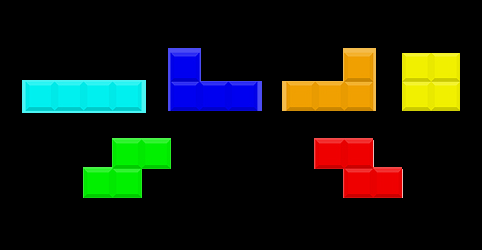

In [ ]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)